<a href="https://colab.research.google.com/github/EmiliaPaula/Ativ3_MineracaoDeDados/blob/main/Ativ3_MineracaoDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


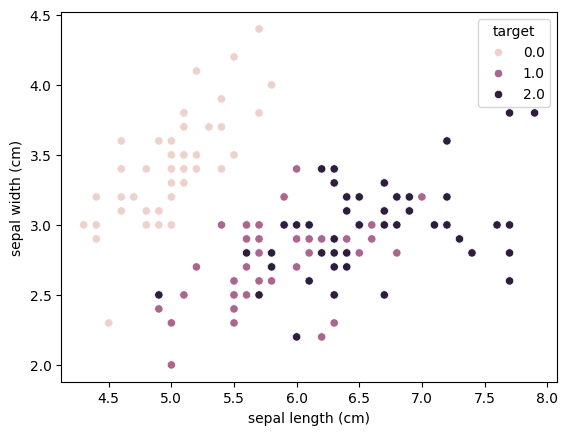

<ipython-input-5-ba8cae57db99>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


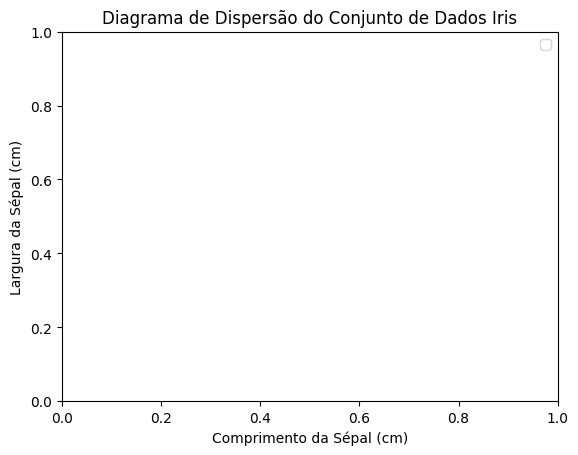

In [ ]:
# @title 3 explorar os dados

import matplotlib.pyplot as plt
import seaborn as sns

# Crie o diagrama de dispersão
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)
plt.show()

# Adicione um título e rótulos de eixos
plt.title('Diagrama de Dispersão do Conjunto de Dados Iris')
plt.xlabel('Comprimento da Sépal (cm)')
plt.ylabel('Largura da Sépal (cm)')


# Adicione uma legenda
plt.legend()


# Mostre o gráfico
plt.show()

In [ ]:
df.isnull().sum()


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.head()

,target
22,0.0
15,0.0
65,1.0
11,0.0
42,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões usando os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo (opcional)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 1.0


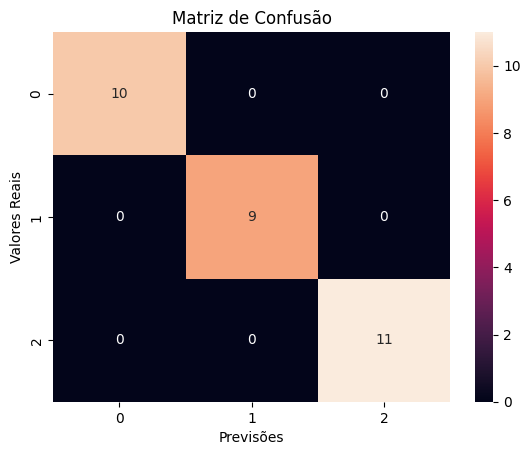

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 1.0


In [ ]:
# @title Criar e treinar o modelo de regressão logpistica

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões usando os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo (opcional)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

y_train_pred = model.predict(X_train)
accuracy_pred = accuracy_score(y_train, y_train_pred)

print(f'Acurácia do modelo: {accuracy}')
print(f'Acurácia prevista do modelo: {accuracy_pred}')

Acurácia do modelo: 1.0
Acurácia prevista do modelo: 0.975


In [ ]:
# @title 4 Preparar os dados

from sklearn.model_selection import train_test_split

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#X.head()

y_train.head()

,target
91,1.0
135,2.0
69,1.0
128,2.0
114,2.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression # ou qualquer outro modelo
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

model = LogisticRegression(max_iter=1000) # ou qualquer outro modelo

skf = StratifiedKFold(n_splits=5) # Define o número de folds (k=5 neste caso)

scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')



print("Acurácia em cada fold:", scores)
print("Acurácia média:", scores.mean())
print("Desvio padrão da acurácia da validação cruzada:", scores.std())

Acurácia em cada fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Acurácia média: 0.9733333333333334
Desvio padrão da acurácia da validação cruzada: 0.02494438257849294


In [ ]:
from sklearn.linear_model import LogisticRegression

# Cria e treina o modelo (se já não estiver treinado)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Obtém os coeficientes
coeficientes = model.coef_

# Obtém o intercept
intercept = model.intercept_

# Imprime os resultados
print("Coeficientes:\n", coeficientes)
print("\nIntercept:\n", intercept)

Coeficientes:
 [[-0.43201755  0.82354188 -2.35116297 -0.96898189]
 [ 0.61827871 -0.42824361 -0.20593038 -0.82995818]
 [-0.18626116 -0.39529826  2.55709335  1.79894007]]

Intercept:
 [  9.49207756   1.63778407 -11.12986163]


In [ ]:
from sklearn import metrics

precision = metrics.precision_score(y_test, y_pred, average='weighted') # 'weighted' para multi-classe
print("Precisão:", precision)

Precisão: 0.10299663299663299


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

# Carregar o dataset Iris
# ... (código anterior para carregar e preparar os dados) ...

# Criar e treinar o modelo de Regressão Logística
# ... (código anterior para criar e treinar o modelo) ...

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular e exibir o recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.9666666666666667
